In [5]:
import util
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import expon
from scipy.stats import kstest
%matplotlib inline

In [6]:
file_name = "../data/commit_timestamps/assorted.csv"
lines = [line.rstrip('\n') for line in open(file_name)]
lines = lines[1:]

In [7]:
ts = {}
for line in lines:
    val = line.split( "," )
    if val[0] in ts.keys():
        ts[ val[0] ].append( val[1] )
    else:
        ts[ val[0] ] = [ val[1] ]

In [8]:
for key in ts.keys():
    print( key, len( ts[key] ) )

angular/angular.js 8765
apple/swift 69296
d3/d3 4138
twbs/bootstrap 17680
twbs/bootstrap-sass 1009
twbs/bootstrap-rubygem 1116
d3/d3-queue 168
twbs/bootstrap-server 39
d3/d3-plugins 653
d3/d3-dsv 109
facebook/react 9828
d3/d3-selection-multi 48
d3/d3-bundler 51
facebook/react-native-applinks 8
d3/d3-transition 287
d3/d3-ease 134
d3/d3-color 169
d3/d3-arrays 209
d3/d3-array 209
d3/d3-dispatch 87
d3/d3-xhr 120
d3/d3-request 120
d3/d3-timer 127
d3/d3-random 70
d3/d3-interpolate 153
d3/d3-format 302
d3/d3-scale 416
d3/d3-time 169
d3/d3-time-format 153
d3/d3-quadtree 158
d3/d3-hull 7
d3/d3-path 57
d3/d3-shape 398
d3/d3-polygon 40
d3/d3-hierarchy 345
Microsoft/vscode-mock-debug 196
Microsoft/vscode-textmate 196
Microsoft/vscode-editorconfig 60
Microsoft/vscode-samples 32
Microsoft/vscode-comment 58
Microsoft/vscode-backspace 38
Microsoft/vscode-MDTools 39
Microsoft/vscode-wordcount 25
Microsoft/vscode-htmltagwrap 57
Microsoft/vscode-jscs 54
apple/swift-package-manager 3562
Microsoft/vscode-s

In [9]:
valid_keys = ["apple/swift", "d3/d3", "facebook/react",
              'tensorflow/tensorflow', 'twbs/bootstrap',
              'Microsoft/vscode', 'facebook/react',
              'angular/angular.js']
for key in valid_keys:
    print( key, len( ts[key] ) )

apple/swift 69296
d3/d3 4138
facebook/react 9828
tensorflow/tensorflow 32316
twbs/bootstrap 17680
Microsoft/vscode 32837
facebook/react 9828
angular/angular.js 8765


In [10]:
FMT = "%Y-%m-%d"
ts_intvl_lst = {}
for key in valid_keys:
    temp_arr = []
    for i in range(1, len( ts[key] ) ):
        curr = ts[key][i].split(" ")[0]
        prev = ts[key][i-1].split(" ")[0]
        if curr == prev:
            continue
        diff = datetime.strptime(curr, FMT) - datetime.strptime(prev, FMT)
        temp_arr.append( diff.days )
    ts_intvl_lst[key] = temp_arr
# print( ts_intvl_lst )

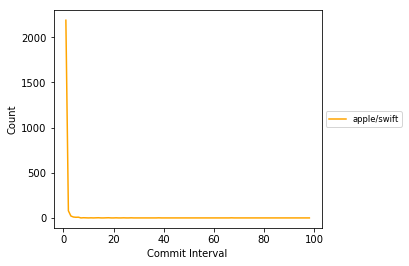

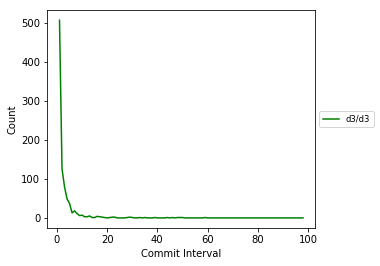

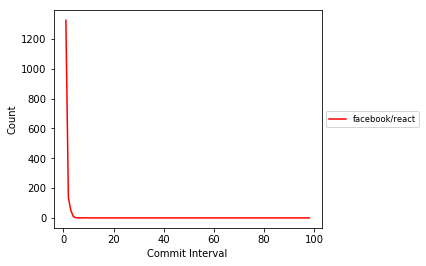

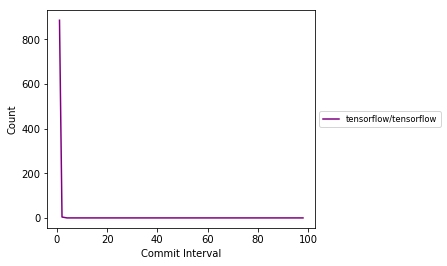

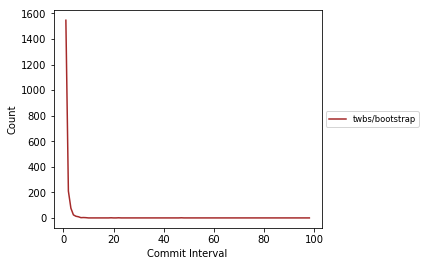

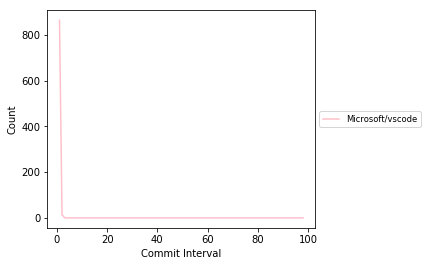

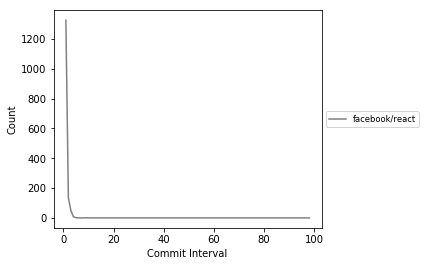

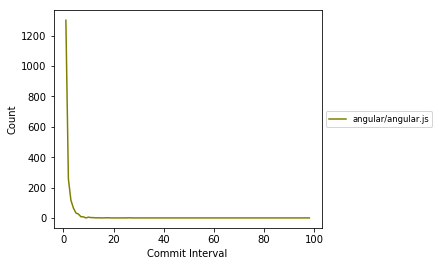

In [23]:
plots = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
counter = 1
cs = dict()
for key in valid_keys:
    [c, ranges] = np.histogram( sorted(ts_intvl_lst[key]), bins=range(1,100) )
    cs[key] = [c,ts_intvl_lst[key]]
    plot = util.getYPlotObj(c, "line", key, colors[counter])
    plots.append( plot )
    counter += 1
    util.plot_graph(range(1,99), [plot], X_label="Commit Interval", Y_label="Count",showLegend=True)


In [15]:
def ks_test(X, rv, n, threshold):
    max_delta = 0
    count = 0
    for i in range(len(X)):
        count += X[i][1]
        cdf_x = count/n
        cdf_y = rv.cdf(X[i][0])
#         print(cdf_y)
        delta = abs(cdf_x - cdf_y)
#         print(delta)
        if delta > max_delta:
            max_delta = delta
    print("####################################")
    print("Threshold(C) = " + str(threshold))
    print("Max_Delta = " + str(max_delta))
    if max_delta > threshold:
        print("Result = False")
        print("####################################")
        return False
    else:
        print("Result = True")
        print("####################################")
        return True

In [22]:
rv = expon()
for key in valid_keys:
    X_dict = dict()
    for i in range(0,len(ts_intvl_lst[key])):
        if ts_intvl_lst[key][i] in X_dict:
            X_dict[ts_intvl_lst[key][i]] += 1
        else:
            X_dict[ts_intvl_lst[key][i]] = 1

    SortX = sorted(X_dict.items(), key=lambda s: s[0])
    ks_test(SortX, rv, len(ts_intvl_lst[key]), 0.5)

####################################
Threshold(C) = 0.5
Max_Delta = 0.307767805276
Result = True
####################################
####################################
Threshold(C) = 0.5
Max_Delta = 0.157402146931
Result = True
####################################
####################################
Threshold(C) = 0.5
Max_Delta = 0.240163838801
Result = True
####################################
####################################
Threshold(C) = 0.5
Max_Delta = 0.361152983772
Result = True
####################################
####################################
Threshold(C) = 0.5
Max_Delta = 0.186831267535
Result = True
####################################
####################################
Threshold(C) = 0.5
Max_Delta = 0.350814594755
Result = True
####################################
####################################
Threshold(C) = 0.5
Max_Delta = 0.240163838801
Result = True
####################################
####################################
Threshold(C) = 0.5
Max_De